## Candy Classification
- Authors: Martin Avila & Hadson Barbosa 

This project presents a complete pipeline for classifying candies using a custom dataset. From dataset creation to model development and evaluation, the entire classification process was implemented from scratch.

In [2]:
import os
from skimage import io, transform
import matplotlib.pyplot as plt
import numpy as np

### 1. Dataset Creation

In [18]:
# List of classes that are going to be use in the project.
class_codification_tabel = [('banana',0), ('bear',1), ('blackberry',2), 
                            ('brick',3), ('car',4), ('mouth',5),
                            ('plane',6), ('strawberry',7), ('watermelon',8), 
                            ('worm',9)
                            ]
print(len(class_codification_tabel))

10


### Adjusting Images
- After deciding on the subject, we captured 10 black-and-white pictures for each class using a Samsung S21 FE.
- Additionally, we resized the images to a resolution of 256x256 pixels to standardize the dataset for further processing.

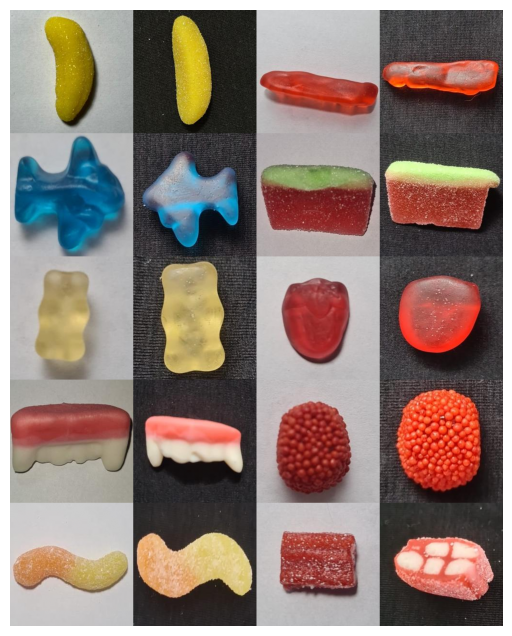

In [13]:
from scripts.mosaico_generator import show_mosaico_images 
from scripts.resize_images import resize_images

input_dir = '/home/mab0205/UTFPR/GitHub/DIP-Candy-Classification/database/all'
output_dir = '/home/mab0205/UTFPR/GitHub/DIP-Candy-Classification/database/resized'
target_size = (256, 256)

resize_images(input_dir, output_dir ,target_size)

root_dir = '/home/mab0205/UTFPR/GitHub/Digital-Image-Processing-Complete-Project-on-Candy-Classification/database/resized_256_256'

show_mosaico_images(root_dir)

- Next Step: Rename all images to a specific format -> ```<CLASSID>-<IMG_SEQUENCE>-V1|V2-B|W.png```

In [14]:
root_dir = '/home/mab0205/UTFPR/GitHub/DIP-Candy-Classification/database/plane_class_4'

image_files = [f for f in os.listdir(root_dir) if os.path.isfile(os.path.join(root_dir, f))]

print(image_files[3:6])

['00-04-V2-W.jpeg', '00-02-V2-B.jpg', '00-04-V1-W.jpeg']


### 2. Data Annotation
- Using **CVAT Web**, we performed bounding box segmentation for each class.

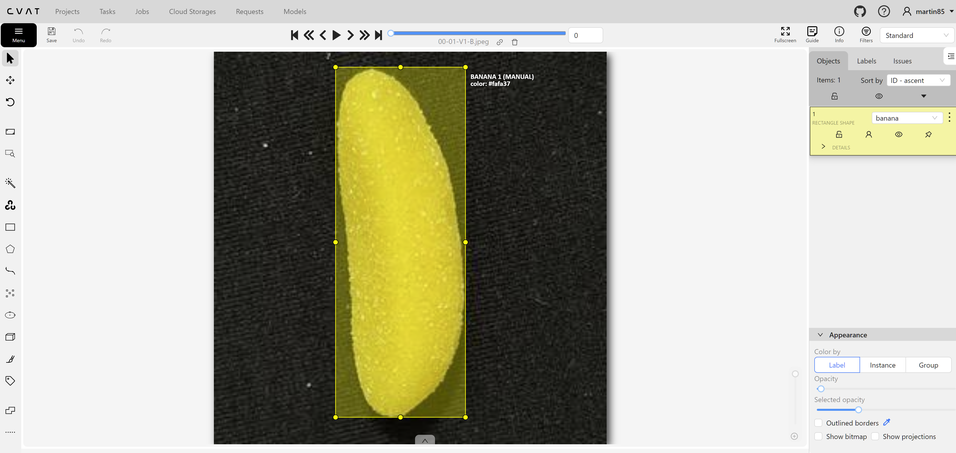

Image 1:
  ID: 0
  Name: 00-01-V1-B.jpeg
  Box Label: banana
  Coordinates: (79.30, 10.09) to (163.99, 238.41)
  Color: #fafa37

Image 2:
  ID: 1
  Name: 00-01-V2-B.jpeg
  Box Label: banana
  Coordinates: (71.49, 18.24) to (168.55, 232.22)
  Color: #fafa37

Image 3:
  ID: 2
  Name: 00-02-V1-B.jpeg
  Box Label: banana
  Coordinates: (38.27, 6.51) to (163.01, 250.79)
  Color: #fafa37



In [28]:
from scripts.fetch_annotations import show_first_3_annotations
from PIL import Image

img = Image.open('/home/mab0205/UTFPR/GitHub/DIP-Candy-Classification/docs/Banana_bounding_box_cvat_example.png')

# Resize the image
width, height = img.size
new_size = (width // 4, height // 4)
resized_img = img.resize(new_size, Image.Resampling.LANCZOS)

resized_img.show()

# Show the annotations created on the segmentatio bounding box stage
xml_file_path = '/home/mab0205/UTFPR/GitHub/DIP-Candy-Classification/annotations.xml'
show_first_3_annotations(xml_file_path)


### 3. Data augmentation 
- what is the purpose of that library?
- why we decide to use that functions? 
- What configurations we did to the functions? 

In [ ]:
# codigo 

### 4. Data Normalization
Data normalization in  (DIP)  involves equalizing histograms to enhance image quality. The process aims to adjust the contrast and brightness of images for improved consistency and clarity.

Steps:

    - Histogram Equalization: Adjust the image's histogram to enhance contrast and distribute pixel values more evenly.
    - Analyzing the Results: Evaluate the outcomes of histogram equalization to ensure that the adjustments meet the desired quality improvements and enhance the image effectively.

plane_class_4
/home/mab0205/UTFPR/GitHub/DIP-Candy-Classification/database/plane_class_4
Class 'plane_class_4' statistics:
Average prototype calculated successfully!
Histogram variance calculated!
Mean histogram calculated!


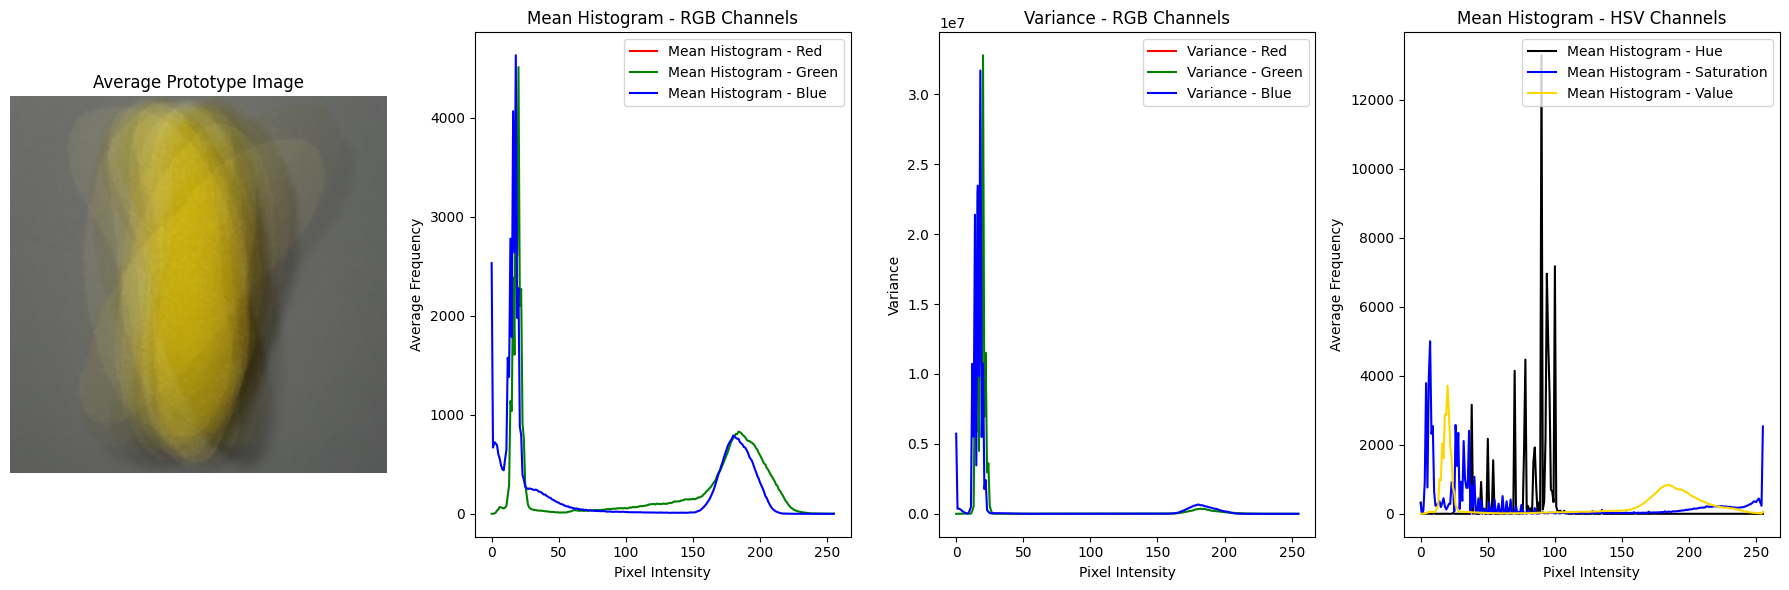

In [2]:
from utils.normalization_plots import generate_image_statitics
folder_path = "/home/mab0205/UTFPR/GitHub/DIP-Candy-Classification/database"
generate_image_statitics(folder_path)

### 5. Segmentation (Ground Truth)
In this case, we will use the ground truth to evaluate the performance of our model in segmenting.


The ground truth is usually obtained by manually or automatic labeling the image.


*We created a binary representation of our image, 0 to background and 1 to the object.*

Manual Steps:
    - 

Automatic Steps:
    -

### 6. Model Training
We test on many classification models. The model learns to map the input images to the corresponding
segmentation masks.

Configurations
    - train:
    - test:
    - val:
Classification Models:
    - 
    -   
    -

### 7. Model Evaluation
The performance of the model is evaluated using metrics
such as accuracy, precision, recall, F1-score, and IoU.